In [78]:
import qctoolkit as qtk
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from glob import glob

%matplotlib inline

import xml.etree.ElementTree as ET
from copy import deepcopy

In [2]:
from IPython.display import SVG, display, HTML

In [3]:
bz_mol = qtk.Molecule('benzene.xyz')
#bz_mol.sort(order='xyz')
bz_mol.center()
bz_mol.rotate(np.pi/2, [0,0,1])
bn_test = bz_mol.copy()
bn_test.setAtoms(0, Z=7)
bn_test.setAtoms(1, Z=5)

In [4]:
np.round(bz_mol.R[:6], decimals=2)

array([[ 0.  ,  1.4 ,  0.  ],
       [ 1.22,  0.7 ,  0.  ],
       [ 1.22, -0.7 ,  0.  ],
       [-0.  , -1.4 ,  0.  ],
       [-1.22, -0.7 ,  0.  ],
       [-1.22,  0.7 ,  0.  ]])

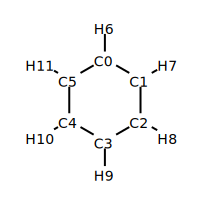

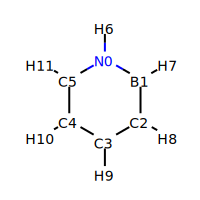

In [5]:
display(SVG(qtk.rdk.mol2svg(bz_mol)))
display(SVG(qtk.rdk.mol2svg(bn_test)))

In [6]:
bz_df = pd.read_csv('energies.txt', sep=' ')
bz_df.columns = ['dE_prd', 'dE_tar', 'label']

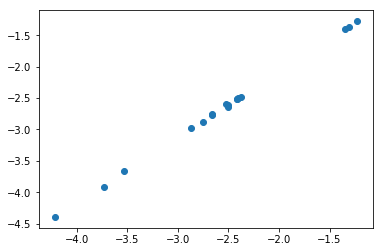

In [7]:
plt.scatter(bz_df.dE_prd, bz_df.dE_tar)

# label structure

In [8]:
bz_df.ix[0]

dE_prd   -1.22599
dE_tar   -1.27486
label           A
Name: 0, dtype: object

In [9]:
dZ = np.array([
    [-1, 0, 0, 0, 0, 1], #A
    [-1, 0, 0, 0, 1, 0], #B
    [-1, 0, 0, 1, 0, 0], #C
    [-1, 0, 0, 1,-1, 1], #D
    [-1, 0, 0,-1, 1, 1], #E
    [ 1, 0, 0, 1,-1,-1], #F
    [-1,-1, 0, 0, 1, 1], #G
    [-1, 0, 1,-1, 0, 1], #H
    [ 0,-1, 1, 0, 1,-1], #I
    [ 0,-1,-1, 0, 1, 1], #J
    [-1, 0, 1, 0,-1, 1], #K
    [ 1,-1,-1, 0, 1, 0], #L
    [-1, 1, 0,-1, 0, 1], #M
    [-1, 0,-1, 0, 1, 1], #N
    [-1, 1,-1, 1,-1, 1], #O
    [-1,-1, 1, 1, 1,-1], #P
    [-1,-1, 1, 1,-1, 1], #Q
])
print dZ.shape

(17, 6)


In [10]:
bz_df['dZ'] = dZ.tolist()

In [11]:
bz_df

,dE_prd,dE_tar,label,dZ
0,-1.225991,-1.274857,A,"[-1, 0, 0, 0, 0, 1]"
1,-1.311933,-1.362165,B,"[-1, 0, 0, 0, 1, 0]"
2,-1.348042,-1.401054,C,"[-1, 0, 0, 1, 0, 0]"
3,-2.402070,-2.496919,D,"[-1, 0, 0, 1, -1, 1]"
4,-2.501732,-2.637672,E,"[-1, 0, 0, -1, 1, 1]"
5,-2.501732,-2.616853,F,"[1, 0, 0, 1, -1, -1]"
6,-2.745997,-2.877748,G,"[-1, -1, 0, 0, 1, 1]"
7,-2.379598,-2.476791,H,"[-1, 0, 1, -1, 0, 1]"
8,-2.524367,-2.590752,I,"[0, -1, 1, 0, 1, -1]"
9,-2.868128,-2.983619,J,"[0, -1, -1, 0, 1, 1]"


In [12]:
def dZ2mol(dZ, mol_base=bz_mol):
    
    dZ = np.asarray(dZ)
    mol_base.Z = np.asarray(mol_base.Z)
    
    Z = np.ones(len(mol_base.Z))
    Z[:len(dZ)] = mol_base.Z[:len(dZ)] + dZ
    R = mol_base.R
    ZR = np.hstack([Z[:,np.newaxis], R])
    
    mol = qtk.Molecule()
    mol.build(ZR)
    mol.center()
    return mol

A


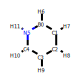

B


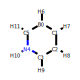

C


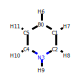

D


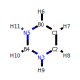

E


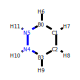

F


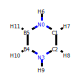

G


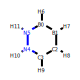

H


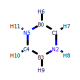

I


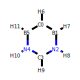

J


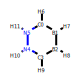

K


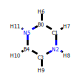

L


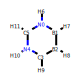

M


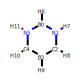

N


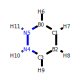

O


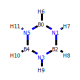

P


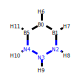

Q


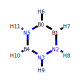

In [14]:
mol_tar = []
for i in range(len(bz_df)):
    mol = dZ2mol(bz_df.ix[i].dZ)
    print bz_df.ix[i].label
    display(SVG(qtk.rdk.mol2svg(mol, figSize=(80,80))))
    mol_tar.append(mol)

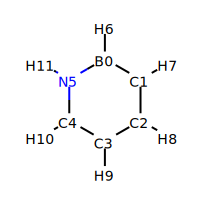

[-1.  0.  0.  0.  0.  1.]


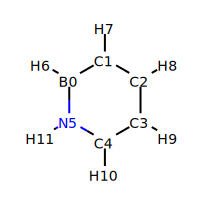

[ 0.  0.  0.  0.  1. -1.]


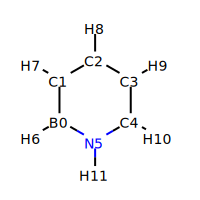

[ 0.  0.  0.  1. -1.  0.]


In [15]:
mol0 = mol_tar[0].copy()
for a in range(3): # 30 degree rotation to 2 pi
    mol = mol0.copy()
    mol.center(mol.getCenterOfMass())
    mol.rotate(a * np.pi/3, u=[0,0,1])
    
    display(SVG(qtk.rdk.mol2svg(mol)))
    
    dZ = np.ones(mol.element_count())
    for i in range(mol.element_count()):
        for j in range(mol.element_count()):
            if np.linalg.norm(mol.R[i] - mol0.R[j]) < 1E-1:
                dZ[j] = mol.Z[i] - 6
    print dZ

In [16]:
def rotate(dZ, angle, show=False):
    
    mol0 = dZ2mol(dZ)
    #mol0.center(mol0.getCenterOfMass())
    
    mol = mol0.copy()
    mol.center(mol.getCenterOfMass())
    mol.rotate(angle, u=[0,0,1])
    
    if show:
        display(SVG(qtk.rdk.mol2svg(mol)))
    
    dZ = np.ones(mol.element_count())
    for i in range(mol.element_count()):
        for j in range(mol.element_count()):
            if np.linalg.norm(mol.R[i] - mol0.R[j]) < 1.:
                dZ[j] = mol.Z[i] - 6
    return dZ

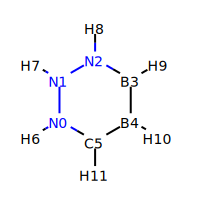

array([ 1., -1., -1.,  0.,  1.,  1.])

In [17]:
rotate([1,1,1,-1,-1,0], 2 * np.pi/3, show=True)

In [18]:
rotate([1,1,1,-1,-1,0], 2 * np.pi/3)

array([ 1., -1., -1.,  0.,  1.,  1.])

# benzene eigenmodes

In [19]:
data_bz = np.load('data_benzene.npz')

In [20]:
import re

def rgb2html(rgb_tuple):
    """ convert an (R, G, B) tuple to #RRGGBB """
    rgb_tuple = tuple(
        (np.array(rgb_tuple) * 255).astype(int).tolist()
    )
    hexcolor = '#%02X%02X%02X' % rgb_tuple
    # that's it! '%02x' means zero-padded, 2-digit hex values
    return hexcolor

def canvas(s, dx, dy, atom_colors={}):
    
    def shift(coord_str, length): return str(float(coord_str) + float(length))
    
    root = ET.fromstring(s)
    new_root = deepcopy(root)

    #####################
    # reset canvas size #
    #####################
    h = int(new_root.attrib['height'].split('p')[0]) + int(dy)
    w = int(new_root.attrib['width'].split('p')[0]) + int(dx)
    new_root.attrib['height'] = str(h) + 'px'
    new_root.attrib['width'] = str(w) + 'px'

    ################
    # move ellipse #
    ################
    # i.e. highlight circles 
    circles = new_root.findall('ellipse')
    for c in circles:
        c.attrib['cx']  = str(float(c.attrib['cx']) + dx / 2.)
        c.attrib['cy']  = str(float(c.attrib['cy']) + dy / 2.)

    ##############
    # move paths #
    ##############
    # i.e. connecting bonds
    paths = new_root.findall('path')
    for p in paths:

        start, end = p.attrib['d'].split(' ')[1:]

        s_x, s_y = start.split(',')
        e_x, e_y = end.split(',')

        s_x = shift(s_x, dx / 2.)
        s_y = shift(s_y, dy / 2.)
        e_x = shift(e_x, dx / 2.)
        e_y = shift(e_y, dy / 2.)

        start = ','.join([s_x, s_y])
        end = ','.join([e_x, e_y])
        new_d = 'M ' + ' '.join([start, end])

        p.attrib['d'] = new_d
        
    ##############
    # move texts #
    ##############
    texts = new_root.findall('text')
    for t in texts:
        t.attrib['x'] = str(float(t.attrib['x']) + dx / 2.)
        t.attrib['y'] = str(float(t.attrib['y']) + dy / 2.)
        text = t.getchildren()[0].text
        head = re.findall('[A-Z][^A-Z0-9]*', text)[0]
        if head in list(atom_colors.iterkeys()):
            rgb = atom_colors[head]
            html = rgb2html(rgb)
            style_str = t.attrib['style']
            style = style_str.split(';fill:')[0]
            t.attrib['style'] = style + ';fill:' + rgb2html(rgb)
            #t.getchildren()[0].text = 'test'
        
    ##########################
    # remove backgroun white #
    ##########################
    for child in new_root:
        if child.tag == "rect":
            new_root.remove(child)

    # convert to xml string
    return ET.tostring(new_root)

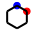

In [54]:
def mol_dZ_highlight(dZ, dx=10, dy=10, figSize=(25, 25), show=False, size=0.4):
    mol = dZ2mol(dZ)
    
    color = {}
    sizes = {}
    highlight = []
    
    for j in range(mol.element_count()):
        dz = mol.Z[j] - 6
        if abs(dz) > 1E-3:
            highlight.append(j)
            sizes[j] = size
            if dz > 0:
                color[j] = tuple([0.,0.,1.])
                #color[j] = tuple(192./255 for _ in range(3))
            elif dz < 0:
                color[j] = tuple([1.,0.,0.])
                #color[j] = tuple(.2 for _ in range(3))
    kw_bz1 = {
        'figSize': figSize,
        'index': False,
        'highlight': highlight,
        'colors': color,
        'sizes': sizes,
        'remove_H': True,
    }
    
    svg = qtk.rdk.mol2svg(bz_mol, **kw_bz1)
    svg = canvas(svg, dx, dy, atom_colors={'B': (1,0,0)})
    if show:
        display(SVG(svg))
    return svg
rdm = mol_dZ_highlight([1,-1,0,0,0,0], show=True)

In [62]:
def eigen2svg(m, data, i, figSize=(25, 25), dx=10, dy=10, weight=0.8, reverse=False):
    svg_list = []
    
    
    if not reverse:
        v = data['v'][:,i]
    else:
        v = -data['v'][:,i]
    w = data['w'][i]
    color = {}
    sizes = {}
    highlight = []
    for j in range(len(data['w'])):
        highlight.append(j)
        sizes[j] = v[j] * weight
        if v[j] != 0:
            if v[j] > 0:
                color[j] = tuple((np.array([73., 163., 198.]) / 255).tolist())
                #color[j] = tuple([0.,0.,1.])
                #color[j] = tuple(192./255 for _ in range(3))
            elif v[j] < 0:
                color[j] = tuple((np.array([198., 73., 131.]) / 255).tolist())
                #color[j] = tuple([1.,0.,0.])
                #color[j] = tuple(.2 for _ in range(3))
    kw_bz1 = {
        #'molSize': (400,400),
        'figSize': figSize,
        'index': False,
        # highlights
        'highlight': highlight,
        'colors': color,
        'sizes': sizes,
        'remove_H': True,
    }
    return canvas(qtk.rdk.mol2svg(m, **kw_bz1), dx, dy)

In [63]:
def eigen2svgs(m, data, figSize=(25, 25), dx=10, dy=10, weight=0.8, reverse=False):
    svg_list = []
    
    for i in range(len(data['w'])):
        svg = eigen2svg(m, data, i, figSize, dx, dy, weight, reverse)
        svg_list.append(svg)
    return svg_list

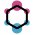

In [64]:
svg = eigen2svg(bz_mol, data_bz, 1, weight=1.0)
SVG(svg)

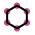

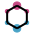

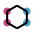

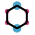

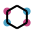

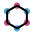

In [65]:
svgs_eig = eigen2svgs(bz_mol, data_bz)
for s in svgs_eig:
    display(SVG(s))

# check estimated energies

<Container object of 17 artists>

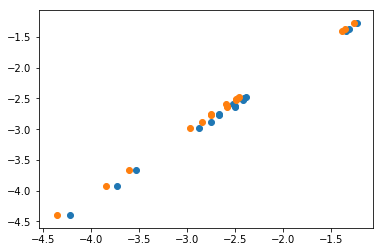

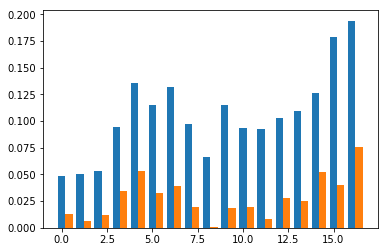

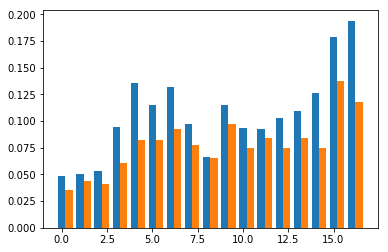

In [66]:
bz_df['dE_prd_eig'] = 0.5 * (np.stack(bz_df.dZ.as_matrix()).dot(data_bz['v']) ** 2).dot(data_bz['w'])
plt.figure()
plt.scatter(bz_df.dE_prd, bz_df.dE_tar)
plt.scatter(bz_df.dE_prd_eig, bz_df.dE_tar)
plt.figure()
width = .4
plt.figure()
plt.bar(np.arange(len(bz_df)), abs(bz_df.dE_tar - bz_df.dE_prd), width)
plt.bar(np.arange(len(bz_df))+width, abs(bz_df.dE_tar - bz_df.dE_prd_eig), width)
plt.figure()
plt.bar(np.arange(len(bz_df)), abs(bz_df.dE_prd - bz_df.dE_tar), width)
plt.bar(np.arange(len(bz_df))+width, abs(bz_df.dE_prd - bz_df.dE_prd_eig), width)

it seems there are two issues:
1. The estimated energy and the eigenvalues/vectors file is inconsistent
2. The estimated and the true energy label is reversed in the text file

# rotate benzene

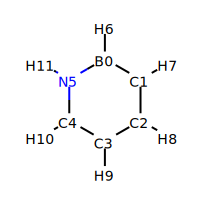

A [-1, 0, 0, 0, 0, 1]
5 [ 0.   0.3 -0.5 -0.9 -0.5  0.8] -1.2616868500000002
3 [ 0.   0.6  0.   0.   1.  -0.8] -1.2616868500000002
5 [ 0.   0.3  0.5  0.9 -0.5  0.8] -1.2616868499999998
5 [-0.  -0.3  0.5 -0.9 -0.5 -0.8] -1.26168685
3 [-0.  -0.6  0.  -0.   1.   0.8] -1.2616868499999998
5 [-0.  -0.3 -0.5  0.9 -0.5 -0.8] -1.2616868500000002


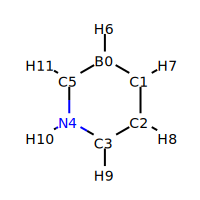

B [-1, 0, 0, 0, 1, 0]
4 [ 0.   0.9 -0.5 -0.9  0.5 -0. ] -1.3556027599999996
4 [0.  0.9 0.5 0.9 0.5 0. ] -1.35560276
2 [ 0. -0.  1. -0. -1. -0.] -1.3556027599999996
4 [-0.  -0.9  0.5 -0.9  0.5 -0. ] -1.3556027600000002
4 [-0.  -0.9 -0.5  0.9  0.5  0. ] -1.3556027599999996
2 [-0.  0. -1. -0. -1. -0.] -1.3556027599999996


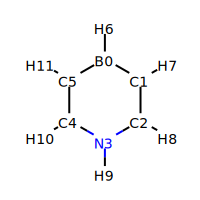

C [-1, 0, 0, 1, 0, 0]
2 [ 0.   1.2  0.  -0.  -0.   0.8] -1.3888127299999995
3 [ 0.   0.6  1.   0.   0.  -0.8] -1.3888127299999995
3 [-0.  -0.6  1.  -0.  -0.   0.8] -1.3888127299999995
2 [-0.  -1.2 -0.   0.   0.  -0.8] -1.3888127299999995
3 [-0.  -0.6 -1.  -0.  -0.   0.8] -1.3888127299999995
3 [ 0.   0.6 -1.   0.   0.  -0.8] -1.3888127299999995


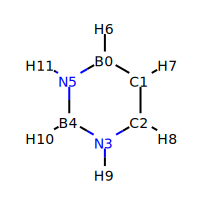

D [-1, 0, 0, 1, -1, 1]
3 [ 0.   0.6  0.  -0.  -1.   1.6] -2.46266776
5 [ 0.   0.3  0.5 -0.9  0.5 -1.6] -2.4626677599999995
5 [-0.  -0.3  0.5  0.9  0.5  1.6] -2.4626677599999995
3 [-0.  -0.6 -0.   0.  -1.  -1.6] -2.4626677599999995
5 [-0.  -0.3 -0.5 -0.9  0.5  1.6] -2.4626677600000004
5 [ 0.   0.3 -0.5  0.9  0.5 -1.6] -2.462667760000001


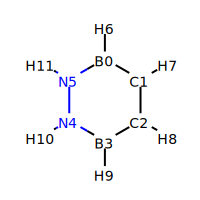

E [-1, 0, 0, -1, 1, 1]
2 [-0.  -0.  -1.  -1.7  0.  -0. ] -2.58407964
4 [ 0.   0.9 -0.5  0.9  1.5  0. ] -2.5840796400000006
4 [ 0.   0.9  0.5  0.9 -1.5 -0. ] -2.5840796399999997
2 [ 0.  -0.   1.  -1.7  0.  -0. ] -2.5840796400000006
4 [-0.  -0.9  0.5  0.9  1.5  0. ] -2.5840796399999997
4 [-0.  -0.9 -0.5  0.9 -1.5 -0. ] -2.584079639999999


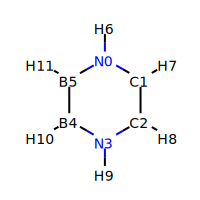

F [1, 0, 0, 1, -1, -1]
2 [ 0.   0.   1.   1.7 -0.   0. ] -2.58407964
4 [-0.  -0.9  0.5 -0.9 -1.5 -0. ] -2.5840796400000006
4 [-0.  -0.9 -0.5 -0.9  1.5  0. ] -2.5840796399999997
2 [-0.   0.  -1.   1.7 -0.   0. ] -2.5840796400000006
4 [ 0.   0.9 -0.5 -0.9 -1.5 -0. ] -2.5840796399999997
4 [ 0.   0.9  0.5 -0.9  1.5  0. ] -2.584079639999999


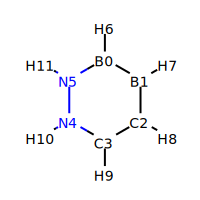

G [-1, -1, 0, 0, 1, 1]
4 [ 0.   0.9 -1.5 -0.9 -0.5 -0. ] -2.8383313999999986
2 [0.  1.7 0.  0.  1.  0. ] -2.8383313999999986
4 [ 0.   0.9  1.5  0.9 -0.5  0. ] -2.838331399999999
4 [-0.  -0.9  1.5 -0.9 -0.5 -0. ] -2.8383313999999995
2 [-0.  -1.7 -0.   0.   1.   0. ] -2.838331399999999
4 [-0.  -0.9 -1.5  0.9 -0.5  0. ] -2.8383313999999986


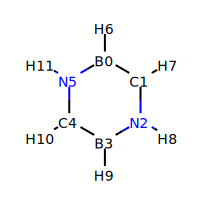

H [-1, 0, 1, -1, 0, 1]
2 [-0.  -0.  -0.  -1.7 -1.  -0. ] -2.4569537600000007
1 [-0.  0.  0.  0.  2.  0.] -2.4569537599999993
2 [ 0.   0.  -0.   1.7 -1.   0. ] -2.4569537600000007
2 [-0.  -0.  -0.  -1.7 -1.  -0. ] -2.4569537600000007
1 [-0.  0.  0.  0.  2.  0.] -2.4569537599999993
2 [ 0.   0.  -0.   1.7 -1.   0. ] -2.4569537600000007


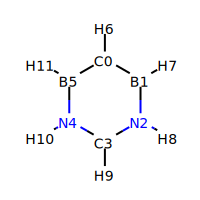

I [0, -1, 1, 0, 1, -1]
2 [ 0.   1.2  0.   0.   0.  -1.6] -2.58979364
3 [ 0.   0.6  1.  -0.  -0.   1.6] -2.5897936399999995
3 [-0.  -0.6  1.   0.   0.  -1.6] -2.58979364
2 [-0.  -1.2 -0.  -0.  -0.   1.6] -2.58979364
3 [-0.  -0.6 -1.   0.   0.  -1.6] -2.5897936399999995
3 [ 0.   0.6 -1.  -0.  -0.   1.6] -2.58979364


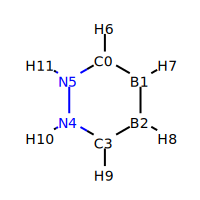

J [0, -1, -1, 0, 1, 1]
1 [-0.  0. -2.  0.  0.  0.] -2.965457279999998
2 [ 0.   1.7 -1.  -0.   0.   0. ] -2.965457279999998
2 [ 0.   1.7  1.  -0.  -0.   0. ] -2.9654572799999985
1 [ 0. -0.  2. -0. -0. -0.] -2.965457279999998
2 [-0.  -1.7  1.   0.  -0.  -0. ] -2.965457279999998
2 [-0.  -1.7 -1.   0.   0.  -0. ] -2.9654572799999985


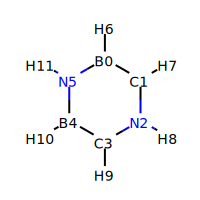

K [-1, 0, 1, 0, -1, 1]
5 [ 0.   0.3  0.5 -0.9 -1.5  0.8] -2.490163730000001
5 [-0.  -0.3  0.5 -0.9  1.5 -0.8] -2.49016373
3 [-0.  -0.6 -0.   1.7 -0.   0.8] -2.4901637299999995
5 [-0.  -0.3 -0.5 -0.9 -1.5 -0.8] -2.49016373
5 [-0.   0.3 -0.5 -0.9  1.5  0.8] -2.49016373
3 [ 0.   0.6  0.   1.7 -0.  -0.8] -2.4901637300000017


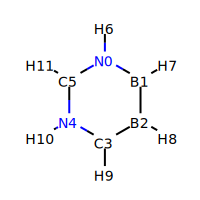

L [1, -1, -1, 0, 1, 0]
5 [-0.  -0.3 -1.5  0.9  0.5 -0.8] -2.7444154899999993
4 [ 0.   1.2 -1.  -0.  -1.   0.8] -2.744415489999999
5 [ 0.   1.4  0.5 -0.9  0.5 -0.8] -2.7444154899999984
5 [0.  0.3 1.5 0.9 0.5 0.8] -2.744415489999999
4 [-0.  -1.2  1.   0.  -1.  -0.8] -2.744415489999999
5 [-0.  -1.4 -0.5 -0.9  0.5  0.8] -2.7444154899999997


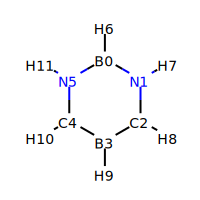

M [-1, 1, 0, -1, 0, 1]
3 [-0.  -0.6 -0.  -1.7  0.   0.8] -2.4901637300000017
5 [-0.  -0.3 -0.5  0.9  1.5 -0.8] -2.490163730000001
5 [ 0.   0.3 -0.5  0.9 -1.5  0.8] -2.49016373
3 [ 0.   0.6  0.  -1.7  0.  -0.8] -2.4901637299999995
5 [0.  0.3 0.5 0.9 1.5 0.8] -2.49016373
5 [ 0.  -0.3  0.5  0.9 -1.5 -0.8] -2.49016373


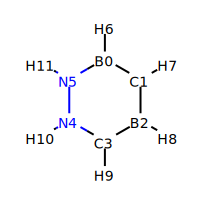

N [-1, 0, -1, 0, 1, 1]
5 [-0.   0.3 -1.5 -0.9  0.5  0.8] -2.7444154899999993
5 [ 0.   1.4 -0.5  0.9  0.5 -0.8] -2.7444154899999997
4 [ 0.   1.2  1.  -0.  -1.   0.8] -2.7444154899999993
5 [ 0.  -0.3  1.5 -0.9  0.5 -0.8] -2.744415489999999
5 [-0.  -1.4  0.5  0.9  0.5  0.8] -2.7444154899999984
4 [-0.  -1.2 -1.   0.  -1.  -0.8] -2.744415489999999


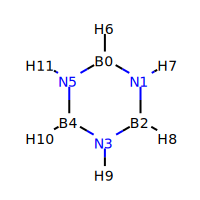

O [-1, 1, -1, 1, -1, 1]
1 [-0.  -0.   0.  -0.  -0.   2.4] -3.6029427300000005
1 [ 0.   0.  -0.   0.   0.  -2.4] -3.6029427300000005
1 [-0.  -0.   0.  -0.  -0.   2.4] -3.6029427300000005
1 [ 0.   0.  -0.   0.   0.  -2.4] -3.6029427300000005
1 [-0.  -0.   0.  -0.  -0.   2.4] -3.6029427300000005
1 [ 0.   0.  -0.   0.   0.  -2.4] -3.6029427300000005


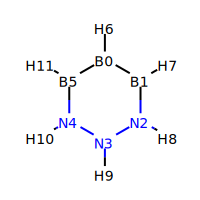

P [-1, -1, 1, 1, 1, -1]
2 [ 0.   2.3  0.   0.   0.  -0.8] -4.354270009999998
3 [ 0.   1.2  2.  -0.  -0.   0.8] -4.354270009999998
3 [-0.  -1.2  2.   0.   0.  -0.8] -4.354270009999998
2 [-0.  -2.3 -0.  -0.  -0.   0.8] -4.354270009999998
3 [-0.  -1.2 -2.   0.   0.  -0.8] -4.354270009999998
3 [ 0.   1.2 -2.  -0.  -0.   0.8] -4.354270009999998


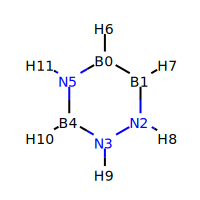

Q [-1, -1, 1, 1, -1, 1]
3 [ 0.   1.2 -0.  -0.  -2.   0.8] -3.84576649
5 [ 0.   0.6  1.  -1.7  1.  -0.8] -3.8457664899999986
5 [-0.  -0.6  1.   1.7  1.   0.8] -3.84576649
3 [-0.  -1.2 -0.  -0.  -2.  -0.8] -3.84576649
5 [-0.  -0.6 -1.  -1.7  1.   0.8] -3.845766490000001
5 [ 0.   0.6 -1.   1.7  1.  -0.8] -3.845766490000002


In [67]:
data_arr = []
for i, dZ0 in enumerate(bz_df.dZ):
    
    rotate(dZ0, 0, show=True)
    print bz_df.ix[i].label, dZ0
    dZ0 = np.asarray(dZ0)
    n_vec_list = []
    # 60 degree rotation for 360 degrees
    for angle_i in range(6):
        dZ = rotate(dZ0, angle_i * np.pi/3)
        dZ_eig = data_bz['v'].T.dot(dZ)
        n_vec = np.ones(len(dZ))[abs(dZ_eig) > 1E-3].sum().astype(int)
        n_vec_list.append(n_vec)
        
        entry = [
            0.5 * (data_bz['v'].T.dot(dZ) ** 2).dot(data_bz['w']),
            bz_df.ix[i].dE_tar,
            dZ,
            np.round(dZ_eig, decimals=3),
            bz_df.ix[i].label,
            n_vec
        ]
        data_arr.append(entry)
        
        print n_vec, 
        print np.round(data_bz['v'].T.dot(dZ), decimals=1),
        print 0.5 * (data_bz['v'].T.dot(dZ) ** 2).dot(data_bz['w'])
columns = ['dE_prd_eig', 'dE_tar', 'dZ', 'dZ_eig', 'label', 'n_vec']
bz_rot = pd.DataFrame(data_arr)
bz_rot.columns = columns

In [68]:
# bz_min_n = []
# for label in set(bz_rot.label):
#     n_vec_min = bz_rot.groupby('label').n_vec.min()[label].astype(int)
#     df = bz_rot.loc[(bz_rot.label == label) & (bz_rot.n_vec == n_vec_min)]
#     bz_min_n.append(df)
# bz_min_n = pd.concat(bz_min_n)
# print len(bz_min_n)
# bz_min_n.head()

# pandas oneliner to get matched extrema indices
idx = bz_rot.groupby(['label'])['n_vec'].transform(min) == bz_rot['n_vec']
bz_min_n = bz_rot[idx]

# pandas oneliner to get single extremum row
bz_rot_selected = bz_rot.sort_values('n_vec', ascending=True).drop_duplicates(['label'])
# sort label from A to Q, same as energy file
bz_rot_selected = bz_rot_selected.sort_values('label')

In [69]:
print len(bz_min_n)
bz_min_n.head()

38


,dE_prd_eig,dE_tar,dZ,dZ_eig,label,n_vec
1,-1.261687,-1.274857,"[0.0, 0.0, 0.0, 0.0, 1.0, -1.0]","[0.0, 0.577, 0.0, 0.0, 1.0, -0.816]",A,3
4,-1.261687,-1.274857,"[0.0, 1.0, -1.0, 0.0, 0.0, 0.0]","[-0.0, -0.577, 0.0, -0.0, 1.0, 0.816]",A,3
8,-1.355603,-1.362165,"[0.0, 0.0, 1.0, 0.0, -1.0, 0.0]","[0.0, -0.0, 1.0, -0.0, -1.0, -0.0]",B,2
11,-1.355603,-1.362165,"[0.0, -1.0, 0.0, 0.0, 0.0, 1.0]","[-0.0, 0.0, -1.0, -0.0, -1.0, -0.0]",B,2
12,-1.388813,-1.401054,"[-1.0, 0.0, 0.0, 1.0, 0.0, 0.0]","[0.0, 1.155, 0.0, -0.0, -0.0, 0.816]",C,2


In [70]:
print len(bz_rot_selected)
bz_rot_selected.sort_values('label')
bz_rot_selected

17


,dE_prd_eig,dE_tar,dZ,dZ_eig,label,n_vec
1,-1.261687,-1.274857,"[0.0, 0.0, 0.0, 0.0, 1.0, -1.0]","[0.0, 0.577, 0.0, 0.0, 1.0, -0.816]",A,3
8,-1.355603,-1.362165,"[0.0, 0.0, 1.0, 0.0, -1.0, 0.0]","[0.0, -0.0, 1.0, -0.0, -1.0, -0.0]",B,2
12,-1.388813,-1.401054,"[-1.0, 0.0, 0.0, 1.0, 0.0, 0.0]","[0.0, 1.155, 0.0, -0.0, -0.0, 0.816]",C,2
18,-2.462668,-2.496919,"[-1.0, 0.0, 0.0, 1.0, -1.0, 1.0]","[0.0, 0.577, 0.0, -0.0, -1.0, 1.633]",D,3
27,-2.584080,-2.637672,"[-1.0, 1.0, 1.0, -1.0, 0.0, 0.0]","[0.0, -0.0, 1.0, -1.732, 0.0, -0.0]",E,2
33,-2.584080,-2.616853,"[1.0, -1.0, -1.0, 1.0, 0.0, 0.0]","[-0.0, 0.0, -1.0, 1.732, -0.0, 0.0]",F,2
40,-2.838331,-2.877748,"[1.0, 1.0, -1.0, -1.0, 0.0, 0.0]","[-0.0, -1.732, -0.0, 0.0, 1.0, 0.0]",G,2
43,-2.456954,-2.476791,"[0.0, 1.0, -1.0, 0.0, 1.0, -1.0]","[-0.0, 0.0, 0.0, 0.0, 2.0, 0.0]",H,1
48,-2.589794,-2.590752,"[0.0, -1.0, 1.0, 0.0, 1.0, -1.0]","[0.0, 1.155, 0.0, 0.0, 0.0, -1.633]",I,2
57,-2.965457,-2.983619,"[0.0, 1.0, 1.0, 0.0, -1.0, -1.0]","[0.0, -0.0, 2.0, -0.0, -0.0, -0.0]",J,1


# visualize rotated benzene and eigen decomposition

In [72]:
svgs_eig_vis = eigen2svgs(bz_mol, data_bz, figSize=(150, 150), dx=45, dy=45)

for index, row in bz_min_n.iterrows():
    mol_svg = mol_dZ_highlight(row.dZ, figSize=(150,150), dx=45, dy=45)
    
    dZe = row.dZ_eig
    dim = len(dZe)
    
    eig_svgs = ''.join([svgs_eig_vis[i] for i in range(dim) if abs(dZe[i]) > 1E-3])
    
    print str(row.dZ) + ' = ' + str(dZe[abs(dZe) > 1E-3])
    no_wrap_div = '<div style="white-space: nowrap">%s</div>' % (mol_svg + "----------" + eig_svgs)
    display(HTML(no_wrap_div))

[ 0.  0.  0.  0.  1. -1.] = [ 0.577  1.    -0.816]


[ 0.  1. -1.  0.  0.  0.] = [-0.577  1.     0.816]


[ 0.  0.  1.  0. -1.  0.] = [ 1. -1.]


[ 0. -1.  0.  0.  0.  1.] = [-1. -1.]


[-1.  0.  0.  1.  0.  0.] = [1.155 0.816]


[ 1.  0.  0. -1.  0.  0.] = [-1.155 -0.816]


[-1.  0.  0.  1. -1.  1.] = [ 0.577 -1.     1.633]


[ 1. -1.  1. -1.  0.  0.] = [-0.577 -1.    -1.633]


[-1.  0.  0. -1.  1.  1.] = [-1.    -1.732]


[-1.  1.  1. -1.  0.  0.] = [ 1.    -1.732]


[ 1.  0.  0.  1. -1. -1.] = [1.    1.732]


[ 1. -1. -1.  1.  0.  0.] = [-1.     1.732]


[-1.  0.  0.  1.  1. -1.] = [1.732 1.   ]


[ 1.  1. -1. -1.  0.  0.] = [-1.732  1.   ]


[ 0.  1. -1.  0.  1. -1.] = [2.]


[ 0.  1. -1.  0.  1. -1.] = [2.]


[ 0. -1.  1.  0.  1. -1.] = [ 1.155 -1.633]


[ 0.  1. -1.  0. -1.  1.] = [-1.155  1.633]


[ 0. -1. -1.  0.  1.  1.] = [-2.]


[ 0.  1.  1.  0. -1. -1.] = [2.]


[ 1.  0. -1.  1. -1.  0.] = [-0.577  1.732  0.816]


[ 1. -1.  0.  1.  0. -1.] = [ 0.577  1.732 -0.816]


[-1. -1.  0.  1.  0.  1.] = [ 1.155 -1.    -1.     0.816]


[ 1.  0.  1. -1. -1.  0.] = [-1.155  1.    -1.    -0.816]


[-1.  1.  0. -1.  0.  1.] = [-0.577 -1.732  0.816]


[-1.  0.  1. -1.  1.  0.] = [ 0.577 -1.732 -0.816]


[-1.  0.  1.  1. -1.  0.] = [ 1.155  1.    -1.     0.816]


[ 1. -1.  0. -1.  0.  1.] = [-1.155 -1.    -1.    -0.816]


[-1.  1. -1.  1. -1.  1.] = [2.449]


[ 1. -1.  1. -1.  1. -1.] = [-2.449]


[-1.  1. -1.  1. -1.  1.] = [2.449]


[ 1. -1.  1. -1.  1. -1.] = [-2.449]


[-1.  1. -1.  1. -1.  1.] = [2.449]


[ 1. -1.  1. -1.  1. -1.] = [-2.449]


[-1. -1.  1.  1.  1. -1.] = [ 2.309 -0.816]


[ 1.  1. -1. -1. -1.  1.] = [-2.309  0.816]


[-1. -1.  1.  1. -1.  1.] = [ 1.155 -2.     0.816]


[ 1. -1.  1. -1. -1.  1.] = [-1.155 -2.    -0.816]


In [73]:
# write molecule and eigenvector svg to png files for ploting
from cairosvg import svg2png
import os

#dir_root = 'mol_png_files'
dir_root = 'mol_svg_files'
if not os.path.exists(dir_root):
    os.makedirs(dir_root)

for i, row in bz_rot_selected.iterrows():
    mol_svg = mol_dZ_highlight(row.dZ)
    f_name = os.path.join(dir_root, "mol_%c.svg" % row.label.upper())
    #svg2png(bytestring=mol_svg, write_to=f_name)
    with open(f_name, 'w') as f:
        f.write(mol_svg)
    
svgs_eig = eigen2svgs(bz_mol, data_bz)
for i, s in enumerate(svgs_eig):
    f_name = os.path.join(dir_root, "eig_%d.svg" % i)
    #svg2png(bytestring=s, write_to=os.path.join(dir_root, "eig_%d.png" % i))
    with open(f_name, 'w') as f:
        f.write(s)

svgs_eigr = eigen2svgs(bz_mol, data_bz, reverse=True)
for i, s in enumerate(svgs_eigr):
    f_name = os.path.join(dir_root, "eigr_%d.svg" % i)
    #svg2png(bytestring=s, write_to=os.path.join(dir_root, "eig_%d.png" % i))
    with open(f_name, 'w') as f:
        f.write(s)

# insert png in figure

# try svgutil

In [74]:
import svgutils.compose as sc

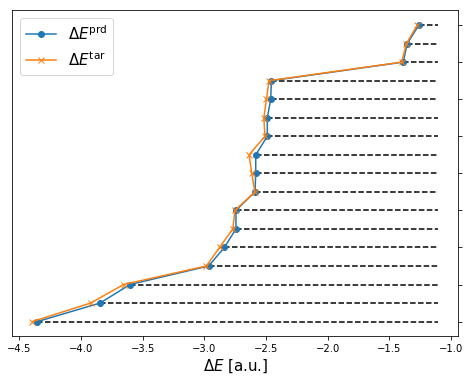

In [75]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)

bzs = bz_rot_selected.sort_values('dE_prd_eig')
ax.plot(bzs.dE_prd_eig, range(len(bzs)), marker='o', label=r'$\Delta E^{\rm prd}$')
ax.plot(bzs.dE_tar, range(len(bzs)), marker='x', label=r'$\Delta E^{\rm tar}$')
ax.legend(fontsize=15)
ax.set_xlabel(r'$\Delta E$ [a.u.]', fontsize=15)
ax.yaxis.set_major_formatter(plt.NullFormatter())
ax.yaxis.tick_right()

x_lim = ax.get_xlim()
itr = 0
for i, r in bzs.iterrows():
    ax.hlines(itr, r.dE_prd_eig, x_lim[1], linestyles='dashed')
    itr += 1

fig.savefig('base.svg', transparent=True)

In [79]:
shift_x = np.arange(7) * 25 + 520
#shift_y = [50]
########
# NOTE #
########
# bzs is sorted with ascending order
shift_y = np.linspace(57, 353, len(bzs), endpoint=True)[::-1]

svgs = [sc.Panel(sc.SVG("./base.svg"))]
eig_svg_files = sorted(glob('mol_svg_files/eig_?.svg'))
eigr_svg_files = sorted(glob('mol_svg_files/eigr_?.svg'))

itr_y = 0
scale = 0.6
for i, r in bzs.iterrows():
    mol_svg_file = os.path.join('%s' % dir_root, 'mol_%c.svg' % r.label.upper())
    mol_svg = sc.Panel(sc.SVG(mol_svg_file).scale(scale).move(shift_x[0], shift_y[itr_y]))
    svgs.append(mol_svg)
    itr_x = 1
    for j, c in enumerate(r.dZ_eig):
        if c > 1E-1:
            ef = sc.SVG(eig_svg_files[j])
            eig_svg = sc.Panel(ef.scale(scale).move(shift_x[itr_x], shift_y[itr_y]))
            svgs.append(eig_svg)
            itr_x += 1
        elif c < -1E-1:
            ef = sc.SVG(eigr_svg_files[j])
            eig_svg = sc.Panel(ef.scale(scale).move(shift_x[itr_x], shift_y[itr_y]))
            svgs.append(eig_svg)
            itr_x += 1
    
    itr_y += 1

sc.Figure("18.2cm", "12cm",
    *svgs
    ).save("compose.svg")
SVG('compose.svg')

In [80]:
shift_x = np.arange(7) * 25 + 520
#shift_y = [50]
########
# NOTE #
########
# bzs is sorted with ascending order
shift_y = np.linspace(57, 353, len(bzs), endpoint=True)[::-1]

svgs = [sc.Panel(sc.SVG("./base.svg"))]
# eig_svg_files = sorted(glob('mol_svg_files/eig_?.svg'))
# eigr_svg_files = sorted(glob('mol_svg_files/eigr_?.svg'))

itr_y = 0
scale = 0.6
for i, r in bzs.iterrows():
    mol_svg = mol_dZ_highlight(r.dZ)
    mol_svg_file = 'mol_tmp.svg'
    with open(mol_svg_file, 'w') as f:
        f.write(mol_svg)
    
    mol_svg = sc.Panel(sc.SVG(mol_svg_file).scale(scale).move(shift_x[0], shift_y[itr_y]))
    svgs.append(mol_svg)
    
    norm = np.linalg.norm(r.dZ)
    
    itr_x = 1
    for j, c in enumerate(r.dZ_eig):
        if c > 1E-1:
            reverse = False
        elif c < -1E-1:
            reverse = True
        
        if abs(c) > 1E-1:
            eig_svg = eigen2svg(bz_mol, data_bz, j, weight=c / norm, reverse=reverse)
            eig_svg_file = 'eig_tmp.svg'
            with open(eig_svg_file, 'w') as f:
                f.write(eig_svg)
            ef = sc.SVG(eig_svg_file)
            eig_svg = sc.Panel(ef.scale(scale).move(shift_x[itr_x], shift_y[itr_y]))
            svgs.append(eig_svg)
            itr_x += 1
    
    itr_y += 1

sc.Figure("18.2cm", "12cm",
    *svgs
    ).save("compose.svg")
SVG('compose.svg')

# eigendecomposition pngs

In [162]:
def append_text(svg, text, fontsize=15, dx=80, dy=0, y_shift=0., x_shift=10, vertical=False):

    s = canvas(svg, dx=dx, dy=dy)
    text = str(text)

    root = ET.fromstring(s)
    new_root = deepcopy(root)

    h = int(new_root.attrib['height'].split('p')[0])
    w = int(new_root.attrib['width'].split('p')[0])

    style_list = [
        "font-size:%dpx" % fontsize,
        "font-style:normal",
        "font-weight:normal",
        "fill-opacity:1",
        "stroke:none",
        "font-family:sans-serif",
        "text-anchor:start",
        "fill:#000000",
    ]

    txt = ET.Element('text')
    if vertical:
        txt.attrib['x'] = str(w / 2. + x_shift)
        txt.attrib['y'] = str(h / 2. + y_shift)
        txt.attrib['style'] = ';'.join(style_list)
    else:
        txt.attrib['x'] = str(x_shift)
        txt.attrib['y'] = str(h / 2. + y_shift)
        txt.attrib['style'] = ';'.join(style_list)
    tsp = ET.Element('tspan')
    txt.append(tsp)
    tsp.text = text
    new_root.append(txt)
    return ET.tostring(new_root)

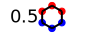

In [163]:
mol_svg = mol_dZ_highlight(bzs.iloc[0].dZ)
SVG(append_text(mol_svg, 0.5, fontsize=18, y_shift=5, dx=70))

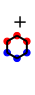

In [164]:
mol_svg = mol_dZ_highlight(bzs.iloc[0].dZ)
SVG(append_text(mol_svg, '+', fontsize=18, x_shift=-5, y_shift=-20, dy=60, dx=0, vertical=True))

In [ ]:
mol_svg = mol_dZ_highlight(bzs.iloc[0].dZ)
SVG(append_text(mol_svg, '+', fontsize=18, x_shift=-5, y_shift=-20, dy=60, dx=0, vertical=True))

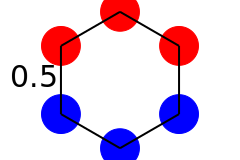

In [84]:
mol_svg = mol_dZ_highlight(bzs.iloc[0].dZ, figSize=(150,150))
SVG(append_text(mol_svg, 0.5, fontsize=30, y_shift=7))

## Small benzene figures

In [95]:
shift_x = np.arange(7) * 40
text_setting = {
    'fontsize':18,
    'y_shift': 5,
    'dx': 30,
    'x_shift': 7
}

shift_y = np.linspace(57, 353, len(bzs), endpoint=True)[::-1]
fig_svgs = [sc.Panel(sc.SVG("./base.svg"))]

svgs_grp = []
itr_y = 0
for i, r in bzs.iterrows():
    
    svgs = []
    mol_svg = mol_dZ_highlight(r.dZ)
    mol_svg = append_text(mol_svg, ' ', **text_setting)
    mol_svg_file = 'mol_tmp.svg'
    with open(mol_svg_file, 'w') as f:
        f.write(mol_svg)
    mol_svg = sc.Panel(sc.SVG(mol_svg_file).move(shift_x[0], 0).scale(0.7))
    svgs.append(mol_svg)
    
    norm = np.linalg.norm(r.dZ)
    
    itr_x = 1
    for j, c in enumerate(r.dZ_eig):
        if c > 1E-1:
            reverse = False
        elif c < -1E-1:
            reverse = True
        
        if abs(c) > 1E-1:
            eig_svg = eigen2svg(bz_mol, data_bz, j, weight=c / norm, reverse=reverse)
            if len(svgs) == 1:
                eig_svg = append_text(eig_svg, '=', **text_setting)
            else:
                eig_svg = append_text(eig_svg, '+', **text_setting)
            eig_svg_file = 'eig_tmp.svg'
            with open(eig_svg_file, 'w') as f:
                f.write(eig_svg)
            ef = sc.SVG(eig_svg_file)
            eig_svg = sc.Panel(ef.move(shift_x[itr_x], 0).scale(0.7))
            
            svgs.append(eig_svg)
            itr_x += 1
    decomp_file = 'mol_decomp_tmp.svg'
    sc.Figure("6cm", "1cm", *svgs).save(decomp_file)
    with open(decomp_file) as f:
        svg = f.read()
    svgs_grp.append(svg)
    
    decomp = sc.SVG(decomp_file)
    decomp_svg = sc.Panel(decomp.move(520, shift_y[itr_y]))
    fig_svgs.append(decomp_svg)
    itr_y += 1
    
final_path = 'bz_comp.svg'
pdf_path = os.path.splitext(final_path)[0] + '.pdf'
    
sc.Figure("1cm", "1cm",
    *fig_svgs
    ).save(final_path)

# command line inkscape to resize svg canvas
# inkscape command line reference:
# http://how-to.wikia.com/wiki/How_to_use_Inkscape_in_commandline_mode/List_of_verbs
os.system("inkscape %s --verb=FitCanvasToDrawing --verb=FileSave --verb=FileQuit" % final_path)

# convert svg to pdf
os.system("rsvg-convert -f pdf -o %s %s" % (pdf_path, final_path))

SVG(final_path)

In [89]:
from cairosvg import svg2png

In [90]:
root_dir = 'bz_eig_small'

if not os.path.exists(root_dir):
    os.makedirs(root_dir)

for i, svg in enumerate(svgs_grp):
    file_name = os.path.join(root_dir, 'bz_eig_%02d.png' % i)
    print 'writing to %s' % file_name
    display(SVG(svg))
    svg2png(bytestring=svg,write_to=file_name)

writing to bz_eig_small/bz_eig_00.png


writing to bz_eig_small/bz_eig_01.png


writing to bz_eig_small/bz_eig_02.png


writing to bz_eig_small/bz_eig_03.png


writing to bz_eig_small/bz_eig_04.png


writing to bz_eig_small/bz_eig_05.png


writing to bz_eig_small/bz_eig_06.png


writing to bz_eig_small/bz_eig_07.png


writing to bz_eig_small/bz_eig_08.png


writing to bz_eig_small/bz_eig_09.png


writing to bz_eig_small/bz_eig_10.png


writing to bz_eig_small/bz_eig_11.png


writing to bz_eig_small/bz_eig_12.png


writing to bz_eig_small/bz_eig_13.png


writing to bz_eig_small/bz_eig_14.png


writing to bz_eig_small/bz_eig_15.png


writing to bz_eig_small/bz_eig_16.png


## large benzene figures

In [92]:
shift_x = np.arange(7) * 150
text_setting = {
    'fontsize':50,
    'y_shift': 10,
    'dx': 30,
    'x_shift': -50
}

svgs_grp = []
for i, r in bzs.iterrows():
    
    svgs = []
    mol_svg = mol_dZ_highlight(r.dZ, figSize=(150,150), dy=70)
    mol_svg = append_text(mol_svg, ' ', **text_setting)
    mol_svg_file = 'mol_tmp.svg'
    with open(mol_svg_file, 'w') as f:
        f.write(mol_svg)
    mol_svg = sc.Panel(sc.SVG(mol_svg_file).scale(scale).move(shift_x[0], 0))
    svgs.append(mol_svg)
    
    norm = np.linalg.norm(r.dZ)
    
    itr_x = 1
    for j, c in enumerate(r.dZ_eig):
        if c > 1E-1:
            reverse = False
        elif c < -1E-1:
            reverse = True
        
        if abs(c) > 1E-1:
            eig_svg = eigen2svg(bz_mol, data_bz, j, reverse=reverse, figSize=(150,150), dy=70)
            if len(svgs) == 1:
                eig_svg = append_text(eig_svg, '=', **text_setting)
            else:
                eig_svg = append_text(eig_svg, '+', **text_setting)
            eig_svg_file = 'eig_tmp.svg'
            with open(eig_svg_file, 'w') as f:
                f.write(eig_svg)
            ef = sc.SVG(eig_svg_file)
            eig_svg = sc.Panel(ef.scale(scale).move(shift_x[itr_x], 0))
            svgs.append(eig_svg)
            itr_x += 1
    sc.Figure("20cm", "4cm", *svgs).save('mol_decomp_tmp.svg')
    with open('mol_decomp_tmp.svg') as f:
        svg = f.read()
    svgs_grp.append(svg)

In [93]:
root_dir = 'bz_eig_big'

if not os.path.exists(root_dir):
    os.makedirs(root_dir)

for i, svg in enumerate(svgs_grp):
    file_name = os.path.join(root_dir, 'bz_eig_%02d.png' % i)
    print 'writing to %s' % file_name
    display(SVG(svg))
    svg2png(bytestring=svg,write_to=file_name)

writing to bz_eig_big/bz_eig_00.png


writing to bz_eig_big/bz_eig_01.png


writing to bz_eig_big/bz_eig_02.png


writing to bz_eig_big/bz_eig_03.png


writing to bz_eig_big/bz_eig_04.png


writing to bz_eig_big/bz_eig_05.png


writing to bz_eig_big/bz_eig_06.png


writing to bz_eig_big/bz_eig_07.png


writing to bz_eig_big/bz_eig_08.png


writing to bz_eig_big/bz_eig_09.png


writing to bz_eig_big/bz_eig_10.png


writing to bz_eig_big/bz_eig_11.png


writing to bz_eig_big/bz_eig_12.png


writing to bz_eig_big/bz_eig_13.png


writing to bz_eig_big/bz_eig_14.png


writing to bz_eig_big/bz_eig_15.png


writing to bz_eig_big/bz_eig_16.png


# Vertical plot with text

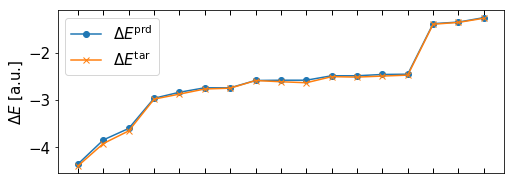

In [224]:
base_path = 'bz_vertical_base.svg'

fig = plt.figure(figsize=(8,3))
ax = fig.add_subplot(111)

bzs = bz_rot_selected.sort_values('dE_prd_eig')
ax.plot(range(len(bzs)), bzs.dE_prd_eig, marker='o', label=r'$\Delta E^{\rm prd}$')
ax.plot(range(len(bzs)), bzs.dE_tar, marker='x', label=r'$\Delta E^{\rm tar}$')
ax.legend(fontsize=15)
ax.set_ylabel(r'$\Delta E$ [a.u.]', fontsize=15)

ax.set_xticks(range(len(bzs)))
ax.xaxis.set_major_formatter(plt.NullFormatter())
ax.tick_params(axis='x', which='both', top=True, direction='in', length=5, width=1)
ax.tick_params(axis='y', labelsize=15)
# ax.yaxis.tick_right()

# x_lim = ax.get_xlim()
# itr = 0
# for i, r in bzs.iterrows():
#     ax.hlines(itr, r.dE_prd_eig, x_lim[1], linestyles='dashed')
#     itr += 1

fig.savefig(base_path, transparent=True)

In [225]:
bzs.head()

,dE_prd_eig,dE_tar,dZ,dZ_eig,label,n_vec
90,-4.354270,-4.394791,"[-1.0, -1.0, 1.0, 1.0, 1.0, -1.0]","[0.0, 2.309, 0.0, 0.0, 0.0, -0.816]",P,2
99,-3.845766,-3.921761,"[1.0, -1.0, 1.0, -1.0, -1.0, 1.0]","[-0.0, -1.155, -0.0, -0.0, -2.0, -0.816]",Q,3
87,-3.602943,-3.655211,"[1.0, -1.0, 1.0, -1.0, 1.0, -1.0]","[0.0, 0.0, -0.0, 0.0, 0.0, -2.449]",O,1
57,-2.965457,-2.983619,"[0.0, 1.0, 1.0, 0.0, -1.0, -1.0]","[0.0, -0.0, 2.0, -0.0, -0.0, -0.0]",J,1
40,-2.838331,-2.877748,"[1.0, 1.0, -1.0, -1.0, 0.0, 0.0]","[-0.0, -1.732, -0.0, 0.0, 1.0, 0.0]",G,2


In [226]:
shift_y_base = 190
shift_y = -np.arange(7) * 45
text_setting = {
    'fontsize':18,
    'y_shift': -18,
    'x_shift': -8,
    'dy': 30,
    'vertical': True,
}
base_setting = {
    'fontsize':12,
    'y_shift': -20,
    'x_shift': -4,
    'dy': 30,
    'vertical': True,
}
shift_x = np.linspace(41, 446, len(bzs), endpoint=True)
scale = .9

fig_svgs = [sc.Panel(sc.SVG(base_path).move(0, 210))]
svgs_grp = []
itr_x = 0
for i, r in bzs.iterrows():
    
    svgs = []
    mol_svg = mol_dZ_highlight(r.dZ)
    mol_svg = append_text(mol_svg, '||', **base_setting)
    mol_svg_file = 'mol_tmp.svg'
    with open(mol_svg_file, 'w') as f:
        f.write(mol_svg)
    mol_svg = sc.Panel(sc.SVG(mol_svg_file).move(0, shift_y[0]).scale(scale))
    svgs.append(mol_svg)
    
    norm = np.linalg.norm(r.dZ)
    
    itr_y = 1
    for j, c in enumerate(r.dZ_eig):
        if c > 1E-1:
            reverse = False
        elif c < -1E-1:
            reverse = True
        
        if abs(c) > 1E-1:
            eig_svg = eigen2svg(bz_mol, data_bz, j, weight=c / norm, reverse=reverse)
            if len(svgs) != r['n_vec']:
                eig_svg = append_text(eig_svg, '+', **text_setting)
            else:
                eig_svg = append_text(eig_svg, ' ', **text_setting)
            eig_svg_file = 'eig_tmp.svg'
            with open(eig_svg_file, 'w') as f:
                f.write(eig_svg)
            ef = sc.SVG(eig_svg_file)
            eig_svg = sc.Panel(ef.move(0, shift_y[itr_y]).scale(scale))
            
            svgs.append(eig_svg)
            itr_y += 1
    decomp_file = 'mol_decomp_tmp.svg'
    sc.Figure("6cm", "1cm", *svgs).save(decomp_file)
    with open(decomp_file) as f:
        svg = f.read()
    svgs_grp.append(svg)
    
    decomp = sc.SVG(decomp_file)
    decomp_svg = sc.Panel(decomp.move(shift_x[itr_x], shift_y_base))
    fig_svgs.append(decomp_svg)
    itr_x += 1
    
final_path = 'bz_comp_vert.svg'
pdf_path = os.path.splitext(final_path)[0] + '.pdf'
    
sc.Figure("1cm", "1cm",
    *fig_svgs
    ).save(final_path)

# command line inkscape to resize svg canvas
# inkscape command line reference:
# http://how-to.wikia.com/wiki/How_to_use_Inkscape_in_commandline_mode/List_of_verbs
os.system("inkscape %s --verb=FitCanvasToDrawing --verb=FileSave --verb=FileQuit" % final_path)

# convert svg to pdf
os.system("rsvg-convert -f pdf -o %s %s" % (pdf_path, final_path))

SVG(final_path)